In [2]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import pandas as pd

#define file path
opioid_file = "Wide_Master.csv"
#read CSV
opioid_data = pd.read_csv(opioid_file)
#make CSV into a dataframe
opioid_df_raw = pd.DataFrame(opioid_data)


opioid_df_raw.head()

,State,County,Year,Total,Heroin,Other,Methadone,Population,LandArea,Bike,...,Income,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance"
0,Alabama,Baldwin,2011,10.0,NaN,NaN,NaN,186717.0,1589.78,1.0,...,67770.0,5147.0,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277
1,Alabama,Cullman,2011,NaN,NaN,NaN,NaN,80536.0,734.84,NaN,...,51374.0,1582.0,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610
2,Alabama,Etowah,2011,NaN,NaN,NaN,NaN,104303.0,534.99,NaN,...,51330.0,1833.0,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563
3,Alabama,Jefferson,2011,39.0,10.0,28.0,10.0,658931.0,1111.28,0.1,...,66409.0,20934.0,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034
4,Alabama,Madison,2011,14.0,NaN,12.0,NaN,340111.0,801.59,0.3,...,76342.0,14164.0,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690


In [3]:
#drop rows which have NaN in columns listed below as they are missing too much information
opioid_df = opioid_df_raw

opioid_df = opioid_df.dropna(subset=['LandArea', 'Income', 'Unemployment', 'GDP Total'])
len(opioid_df.index)

5048

In [4]:
# Make all other NaN in data 0
clean_df=opioid_df.fillna(0)

#Recalculate the Death Total as dataset documentation states totals do not all add up 
#"due to the fact that low death rate of a county was withheld from data to protect privacy of individuals" 
#for this study purposes those deaths with withheld information will not be used. All Death totals is a sum of the three possible causes.
clean_df['Death Total']=clean_df[['Heroin', 'Other', 'Methadone']].sum(axis=1)
#delete the original total column
del clean_df['Total']
clean_df.head(15)


,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,5147.0,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277,0.0
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,1582.0,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610,0.0
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,1833.0,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563,0.0
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,20934.0,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034,48.0
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,14164.0,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690,12.0
5,Alabama,Mobile,2011,0.0,0.0,0.0,412577.0,1229.44,0.1,8.3,...,10353.0,34983.0,18327.0,89397.0,45351.0,77770.0,10.8,17901892.0,1474168,0.0
6,Alabama,Shelby,2011,0.0,0.0,0.0,197936.0,784.93,0.0,7.9,...,8237.0,35082.0,16044.0,28446.0,11010.0,37186.0,6.2,8268481.0,490108,0.0
8,Alabama,Tuscaloosa,2011,0.0,0.0,0.0,197211.0,1321.75,0.2,9.5,...,4714.0,17400.0,11918.0,35385.0,16568.0,31285.0,8.3,9382954.0,463507,0.0
9,Alabama,Walker,2011,0.0,0.0,17.0,66661.0,791.19,0.0,0.0,...,579.0,2881.0,1774.0,16597.0,11204.0,14207.0,11.3,1795958.0,185026,17.0
11,Alaska,Fairbanks North Star Borough,2011,0.0,0.0,0.0,99192.0,7338.21,1.1,13.1,...,4231.0,9714.0,6375.0,15289.0,4059.0,22632.0,6.4,5562537.0,375558,0.0


In [5]:
#Attempt to remove string values
clean_df = clean_df.replace(['(D)'], None)

In [6]:
# check to make sure the string value was removed
clean_df['GDP Education, Health, Social Assistance'].value_counts()

274365     3
683722     3
80349      3
703469     3
296435     3
          ..
1281335    1
208191     1
278498     1
2876215    1
196681     1
Name: GDP Education, Health, Social Assistance, Length: 4896, dtype: int64

In [7]:
#Once string values removed, change column type to make math possible
clean_df['GDP Education, Health, Social Assistance'] = pd.to_numeric(clean_df['GDP Education, Health, Social Assistance'])

In [8]:
# Save into a new CSV called Clean_data.csv for analysis
clean_df.to_csv('clean_data.csv')

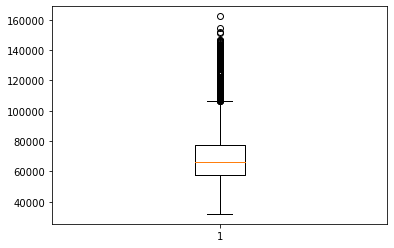

In [9]:
# made a box plot to look into the distribution of the income data, it displayed alot of outliers which is to be expected due 
#to the how unevenly distributed wealth is in the US
incomes = clean_df['Income']
plt.boxplot(incomes)
plt.show()

In [10]:
#Determine the quantiles of the income data
quartiles = incomes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


In [11]:
for col in clean_df.columns:
    print(col)

State
County
Year
Heroin
Other
Methadone
Population
LandArea
Bike
Carpool
Alone
Public
Walk
Home
Income
Non_US_Born
Bachelor_Degree
Grad_Degree
HS_Grad
Less_Than_HS
Associates_Degree
Unemployment
GDP Total
GDP Education, Health, Social Assistance
Death Total


In [12]:
#create pop density column
pop_density = clean_df['Population']/clean_df['LandArea']
pop_density

0       117.448326
1       109.596647
2       194.962523
3       592.947772
4       424.295463
           ...    
5407    313.677734
5408    728.971742
5409    392.216161
5410      4.334040
5411     14.895466
Length: 5048, dtype: float64

In [13]:
#Create a column in the Clean df for the population density
clean_df['Population Density'] = pop_density
clean_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277,0.0,117.448326
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610,0.0,109.596647
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563,0.0,194.962523
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034,48.0,592.947772
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690,12.0,424.295463


In [14]:
#create new dataframe for education data analysis
edu_df = clean_df.iloc[:,[16,17,18,19,20]]
edu_df.head()

,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree
0,22946.0,10923.0,36271.0,15094.0,39216.0
1,4807.0,2940.0,17883.0,12788.0,16286.0
2,6642.0,4270.0,22939.0,13064.0,24325.0
3,78798.0,48016.0,121313.0,58142.0,131726.0
4,50973.0,30157.0,48925.0,24067.0,62801.0


In [15]:
#create new list with total educated and calculate the percent of the total educated which have reached each education level
edu_df['Total Educated'] = edu_df.sum(axis=1)
edu_df['Bachelors %'] = edu_df['Bachelor_Degree']/edu_df['Total Educated']*100
edu_df['Grad %'] = edu_df['Grad_Degree']/edu_df['Total Educated']*100
edu_df['HS %'] = edu_df['HS_Grad']/edu_df['Total Educated']*100
edu_df['Less HS %'] = edu_df['Less_Than_HS']/edu_df['Total Educated']*100
edu_df['Associates %'] = edu_df['Associates_Degree']/edu_df['Total Educated']*100
#delete the counts of each education level as we will only be using the percents of the total educated
del edu_df['Bachelor_Degree']
del edu_df['Grad_Degree']                             
del edu_df['HS_Grad']                                     
del edu_df['Less_Than_HS']                                
del edu_df['Associates_Degree']
edu_df

<ipython-input-15-64b5e68324a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_df['Total Educated'] = edu_df.sum(axis=1)
<ipython-input-15-64b5e68324a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_df['Bachelors %'] = edu_df['Bachelor_Degree']/edu_df['Total Educated']*100
<ipython-input-15-64b5e68324a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %
0,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450
1,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132
2,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143
3,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773
4,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826
...,...,...,...,...,...,...
5407,93734.0,21.674099,8.029104,30.188619,5.580686,34.527493
5408,277757.0,28.266074,14.650576,23.609126,3.997739,29.476485
5409,113634.0,19.547847,7.777602,34.327754,7.637679,30.709119
5410,26781.0,15.525933,7.740562,31.727717,8.890631,36.115156


In [16]:
clean_df.dtypes


State                                        object
County                                       object
Year                                          int64
Heroin                                      float64
Other                                       float64
Methadone                                   float64
Population                                  float64
LandArea                                    float64
Bike                                        float64
Carpool                                     float64
Alone                                       float64
Public                                      float64
Walk                                        float64
Home                                        float64
Income                                      float64
Non_US_Born                                 float64
Bachelor_Degree                             float64
Grad_Degree                                 float64
HS_Grad                                     float64
Less_Than_HS

In [17]:
# Merge the results of the education df with the clean df to add the % education levels
combined_df = pd.merge(clean_df,edu_df, left_index=True,right_index=True)
#Delete rows which will not be used in our analysis 
del combined_df['Bike']
del combined_df['Alone']
del combined_df['Carpool']
del combined_df['Walk']
del combined_df['Home']
del combined_df['Public']
del combined_df['Bachelor_Degree']
del combined_df['Grad_Degree']                             
del combined_df['HS_Grad']                                     
del combined_df['Less_Than_HS']                                
del combined_df['Associates_Degree']
combined_df

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,...,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,67770.0,5147.0,...,5016735.0,478277,0.0,117.448326,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,51374.0,1582.0,...,2298846.0,207610,0.0,109.596647,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,51330.0,1833.0,...,2801621.0,430563,0.0,194.962523,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,66409.0,20934.0,...,39515681.0,4542034,48.0,592.947772,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,76342.0,14164.0,...,19512201.0,1135690,12.0,424.295463,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,Wisconsin,Washington,2017,0.0,12.0,0.0,135101.0,430.70,89470.0,2956.0,...,5636773.0,476010,12.0,313.677734,93734.0,21.674099,8.029104,30.188619,5.580686,34.527493
5408,Wisconsin,Waukesha,2017,27.0,27.0,0.0,400621.0,549.57,105275.0,17376.0,...,28028503.0,2927629,54.0,728.971742,277757.0,28.266074,14.650576,23.609126,3.997739,29.476485
5409,Wisconsin,Winnebago,2017,0.0,0.0,0.0,170414.0,434.49,71572.0,4719.0,...,9274302.0,649081,0.0,392.216161,113634.0,19.547847,7.777602,34.327754,7.637679,30.709119
5410,Wyoming,Fremont,2017,0.0,0.0,0.0,39803.0,9183.81,70101.0,469.0,...,1595939.0,138479,0.0,4.334040,26781.0,15.525933,7.740562,31.727717,8.890631,36.115156


In [18]:
#Create a state df to look at state by state numbers from 2011 to 2017
state_df = combined_df.groupby(['State'])[['Heroin', 'Other','Methadone','Death Total', 'Population','LandArea']].sum()
aver_income = combined_df.groupby(['State'])[['Income', 'Non_US_Born','GDP Total']].mean()
state_df = pd.merge(aver_income, state_df, left_index=True,right_index=True)
state_df

,Income,Non_US_Born,GDP Total,Heroin,Other,Methadone,Death Total,Population,LandArea
State,,,,,,,,,
Alabama,64576.730159,7910.634921,1.205206e+07,428.0,328.0,108.0,864.0,15980631.0,62298.53
Alaska,81870.142857,2794.357143,4.190802e+06,0.0,10.0,0.0,10.0,1102195.0,163894.78
Arizona,61884.119048,113064.333333,4.311028e+07,1324.0,2151.0,409.0,3884.0,42349012.0,359471.42
Arkansas,62702.000000,9158.428571,8.413269e+06,0.0,271.0,0.0,271.0,7268049.0,28934.50
California,80820.428571,246919.938776,6.374420e+07,3127.0,6625.0,1483.0,11235.0,255751474.0,770515.90
Colorado,81450.071429,25159.214286,1.841025e+07,358.0,542.0,21.0,921.0,15631911.0,84533.54
Connecticut,94811.339286,52695.250000,3.030717e+07,1930.0,860.0,286.0,3076.0,25119335.0,33896.52
Delaware,74631.523810,22013.095238,2.091484e+07,331.0,263.0,32.0,626.0,6545528.0,13639.85
Florida,66936.857143,58201.710204,1.920038e+07,1826.0,5279.0,1127.0,8232.0,111108367.0,216777.75


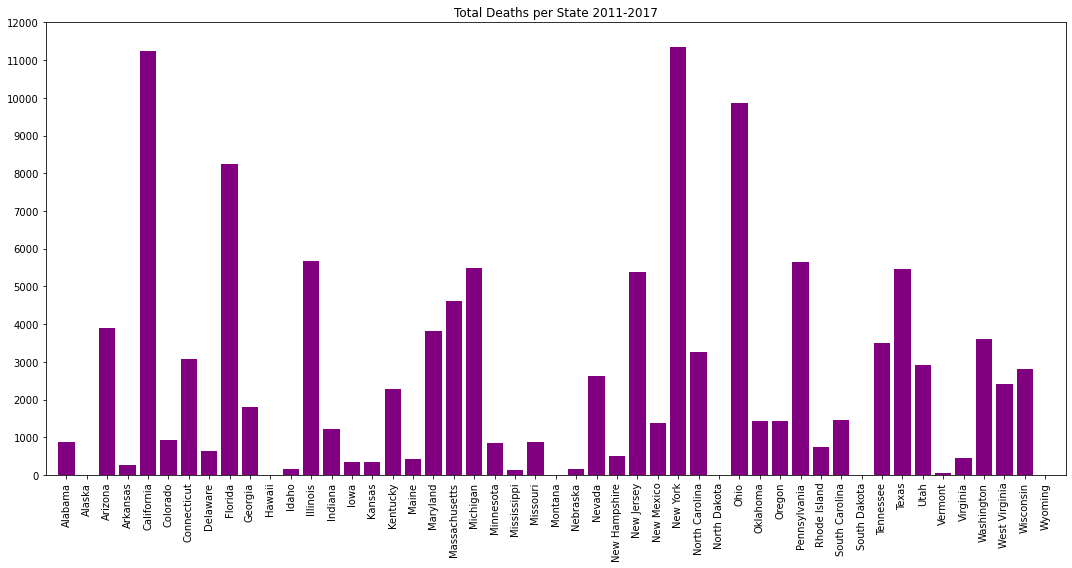

In [19]:
# Total Deaths per State 2011-2017 create a bar graph, this resulted in us making a new graph which desplayed the data per capita
#as we realized this format was not descriptive do to how different population were
yticks = [0, 1000, 2000, 3000, 4000, 5000, 
          6000, 7000, 8000, 9000, 10000, 11000, 12000]
plt.figure(figsize=(15, 8))
plt.bar(state_df.index, state_df['Death Total'], color='purple')
plt.title('Total Deaths per State 2011-2017')
plt.xticks(rotation='vertical')
plt.yticks(yticks)
plt.tight_layout()
plt.xlim(-1, 49, -.1)
plt.savefig('Total Deaths per State 2011-2017')
plt.show()

In [20]:
combined_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,...,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,67770.0,5147.0,...,5016735.0,478277,0.0,117.448326,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,51374.0,1582.0,...,2298846.0,207610,0.0,109.596647,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,51330.0,1833.0,...,2801621.0,430563,0.0,194.962523,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,66409.0,20934.0,...,39515681.0,4542034,48.0,592.947772,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,76342.0,14164.0,...,19512201.0,1135690,12.0,424.295463,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826


In [21]:
# use .loc to create a df for each year of analysis
eleven_df = clean_df.loc[clean_df['Year']==2011]
twelve_df = clean_df.loc[clean_df['Year']==2012]
thirteen_df = clean_df.loc[clean_df['Year']==2013]
fourteen_df = clean_df.loc[clean_df['Year']==2014]
fifteen_df = clean_df.loc[clean_df['Year']==2015]
sixteen_df = clean_df.loc[clean_df['Year']==2016]
seventeen_df = clean_df.loc[clean_df['Year']==2017]

In [22]:
#create new columns by state and year showing deaths
eleven_state = eleven_df.groupby(['State'])['Death Total'].sum()
twelve_state = twelve_df.groupby(['State'])['Death Total'].sum()
thirteen_state = thirteen_df.groupby(['State'])['Death Total'].sum()
fourteen_state = fourteen_df.groupby(['State'])['Death Total'].sum()
fifteen_state = fifteen_df.groupby(['State'])['Death Total'].sum()
sixteen_state = sixteen_df.groupby(['State'])['Death Total'].sum()
seventeen_state = seventeen_df.groupby(['State'])['Death Total'].sum()

In [23]:
#new dataframe deaths by state by year
year_death = pd.DataFrame({'2011':eleven_state, '2012':twelve_state, '2013':thirteen_state, '2014':fourteen_state, '2015':fifteen_state, '2016':sixteen_state, '2017':seventeen_state})
year_death

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,77.0,59.0,74.0,180.0,154.0,158.0,162.0
Alaska,0.0,0.0,0.0,0.0,10.0,0.0,0.0
Arizona,475.0,475.0,414.0,529.0,575.0,664.0,752.0
Arkansas,18.0,22.0,33.0,51.0,56.0,47.0,44.0
California,1665.0,1493.0,1615.0,1685.0,1657.0,1488.0,1632.0
Colorado,53.0,73.0,91.0,158.0,156.0,193.0,197.0
Connecticut,115.0,94.0,380.0,481.0,614.0,704.0,688.0
Delaware,88.0,40.0,61.0,92.0,88.0,74.0,183.0
Florida,1288.0,912.0,860.0,933.0,1213.0,1480.0,1546.0


In [24]:
#create new columns by state and year showing income
eleven_inc = eleven_df.groupby(['State'])['Income'].mean()
twelve_inc = twelve_df.groupby(['State'])['Income'].mean()
thirteen_inc = thirteen_df.groupby(['State'])['Income'].mean()
fourteen_inc = fourteen_df.groupby(['State'])['Income'].mean()
fifteen_inc = fifteen_df.groupby(['State'])['Income'].mean()
sixteen_inc = sixteen_df.groupby(['State'])['Income'].mean()
seventeen_inc = seventeen_df.groupby(['State'])['Income'].mean()

In [25]:
#new dataframe income by state by year
year_inc = pd.DataFrame({'2011':eleven_inc, '2012':twelve_inc, '2013':thirteen_inc, '2014':fourteen_inc, '2015':fifteen_inc, '2016':sixteen_inc, '2017':seventeen_inc})
year_inc

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,63323.666667,63377.111111,63466.666667,64024.000000,63994.555556,65666.555556,68184.555556
Alaska,77659.500000,79151.500000,80083.500000,81300.000000,82285.500000,85282.000000,87329.000000
Arizona,61439.833333,61053.166667,60590.500000,60766.166667,61088.333333,62789.666667,65461.166667
Arkansas,60047.833333,60307.500000,61256.000000,62484.333333,62972.000000,64468.500000,67377.833333
California,78248.342857,78245.542857,78279.828571,79398.914286,80267.400000,83368.971429,87934.000000
Colorado,78809.166667,79008.333333,79341.666667,80462.500000,81527.166667,83778.500000,87223.166667
Connecticut,91918.250000,92539.375000,93034.625000,94038.125000,94845.500000,97106.750000,100196.750000
Delaware,72154.666667,72546.666667,72947.000000,73874.000000,74658.666667,76138.333333,80101.333333
Florida,65974.857143,65428.800000,65043.000000,65842.342857,66527.885714,68441.457143,71299.657143


In [26]:
#create new columns by state and year showing population
eleven_pop = eleven_df.groupby(['State'])['Population'].mean()
twelve_pop = twelve_df.groupby(['State'])['Population'].mean()
thirteen_pop = thirteen_df.groupby(['State'])['Population'].mean()
fourteen_pop = fourteen_df.groupby(['State'])['Population'].mean()
fifteen_pop = fifteen_df.groupby(['State'])['Population'].mean()
sixteen_pop = sixteen_df.groupby(['State'])['Population'].mean()
seventeen_pop = seventeen_df.groupby(['State'])['Population'].mean()

In [27]:
#new dataframe population by state and year
year_pop = pd.DataFrame({'2011':eleven_pop, '2012':twelve_pop, '2013':thirteen_pop, '2014':fourteen_pop, '2015':fifteen_pop, '2016':sixteen_pop, '2017':seventeen_pop})
year_pop.head()

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,2.494426e+05,2.509339e+05,2.524146e+05,2.539427e+05,2.550672e+05,2.562903e+05,2.575344e+05
Alaska,7.774250e+04,7.858600e+04,7.879150e+04,7.841700e+04,7.884500e+04,7.955550e+04,7.916000e+04
Arizona,9.667222e+05,9.783312e+05,9.904920e+05,1.007213e+06,1.022996e+06,1.039054e+06,1.053360e+06
Arkansas,1.682627e+05,1.698698e+05,1.715233e+05,1.727562e+05,1.744093e+05,1.762968e+05,1.782233e+05
California,1.016683e+06,1.026412e+06,1.034393e+06,1.047226e+06,1.056492e+06,1.059241e+06,1.066738e+06


In [28]:
# #2011 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(eleven_inc.index,eleven_inc)
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [29]:
# #2012 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(twelve_inc.index, twelve_inc, color='red')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [30]:
# #2013 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(thirteen_inc.index,thirteen_inc, color='green')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [31]:
# #2014 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(fourteen_inc.index, fourteen_inc, color='pink')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [32]:
# #2015 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(fifteen_inc.index,fifteen_inc, color='yellow')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [33]:
# #2016 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(sixteen_inc.index,sixteen_inc, color='orange')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [34]:
# #2017 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(seventeen_inc.index,seventeen_inc, color='black')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [35]:
#new dataframe with income per capita
inc_per = year_inc/year_pop 
inc_per.head()

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,0.253861,0.252565,0.251438,0.252120,0.250893,0.256219,0.264759
Alaska,0.998932,1.007196,1.016398,1.036765,1.043636,1.071981,1.103196
Arizona,0.063555,0.062405,0.061172,0.060331,0.059715,0.060430,0.062145
Arkansas,0.356870,0.355022,0.357129,0.361691,0.361059,0.365682,0.378053
California,0.076964,0.076232,0.075677,0.075818,0.075975,0.078706,0.082433


In [36]:
avg_inc_per = (inc_per['2011'] + inc_per['2012'] + inc_per['2013'] + inc_per['2014']\
+ inc_per['2015'] + inc_per['2016'] + inc_per['2017']) / 7
inc_per['avg income per'] = avg_inc_per
inc_per.head()

,2011,2012,2013,2014,2015,2016,2017,avg income per
State,,,,,,,,
Alabama,0.253861,0.252565,0.251438,0.252120,0.250893,0.256219,0.264759,0.254551
Alaska,0.998932,1.007196,1.016398,1.036765,1.043636,1.071981,1.103196,1.039729
Arizona,0.063555,0.062405,0.061172,0.060331,0.059715,0.060430,0.062145,0.061393
Arkansas,0.356870,0.355022,0.357129,0.361691,0.361059,0.365682,0.378053,0.362215
California,0.076964,0.076232,0.075677,0.075818,0.075975,0.078706,0.082433,0.077401


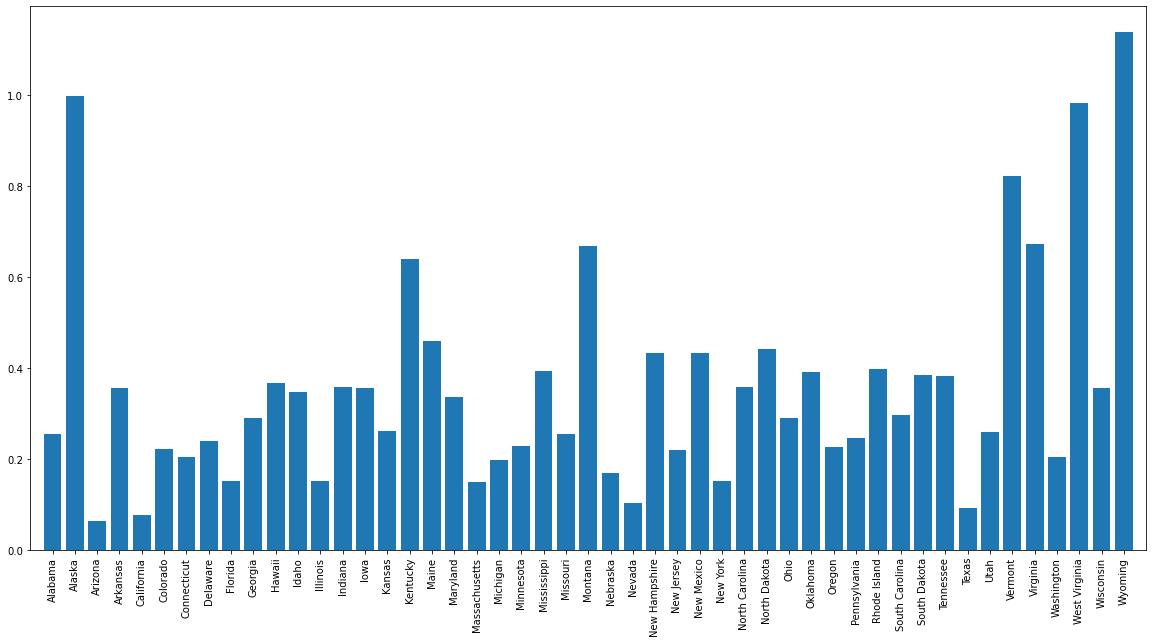

In [37]:
# 2011 Income per Capita graphic
plt.figure(figsize=(20,10))
plt.bar(inc_per.index, inc_per['2011'])
plt.xlim(-1,49)
plt.xticks(rotation='vertical')
plt.show()

In [38]:
#new dataframe with deaths per capita
death_per = year_death/year_pop
death_per.head()

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,0.000309,0.000235,0.000293,0.000709,0.000604,0.000616,0.000629
Alaska,0.000000,0.000000,0.000000,0.000000,0.000127,0.000000,0.000000
Arizona,0.000491,0.000486,0.000418,0.000525,0.000562,0.000639,0.000714
Arkansas,0.000107,0.000130,0.000192,0.000295,0.000321,0.000267,0.000247
California,0.001638,0.001455,0.001561,0.001609,0.001568,0.001405,0.001530


In [39]:
avg_death_per = (death_per['2011'] + death_per['2012'] + death_per['2013'] + death_per['2014']\
+ death_per['2015'] + death_per['2016'] + death_per['2017']) / 7

In [40]:
death_per['avg deaths per'] = avg_death_per
death_per

,2011,2012,2013,2014,2015,2016,2017,avg deaths per
State,,,,,,,,
Alabama,0.000309,0.000235,0.000293,0.000709,0.000604,0.000616,0.000629,0.000485
Alaska,0.000000,0.000000,0.000000,0.000000,0.000127,0.000000,0.000000,0.000018
Arizona,0.000491,0.000486,0.000418,0.000525,0.000562,0.000639,0.000714,0.000548
Arkansas,0.000107,0.000130,0.000192,0.000295,0.000321,0.000267,0.000247,0.000223
California,0.001638,0.001455,0.001561,0.001609,0.001568,0.001405,0.001530,0.001538
Colorado,0.000149,0.000203,0.000249,0.000425,0.000412,0.000501,0.000505,0.000349
Connecticut,0.000257,0.000209,0.000845,0.001070,0.001368,0.001575,0.001534,0.000980
Delaware,0.000291,0.000131,0.000198,0.000295,0.000279,0.000233,0.000571,0.000285
Florida,0.002979,0.002080,0.001937,0.002066,0.002632,0.003154,0.003234,0.002583


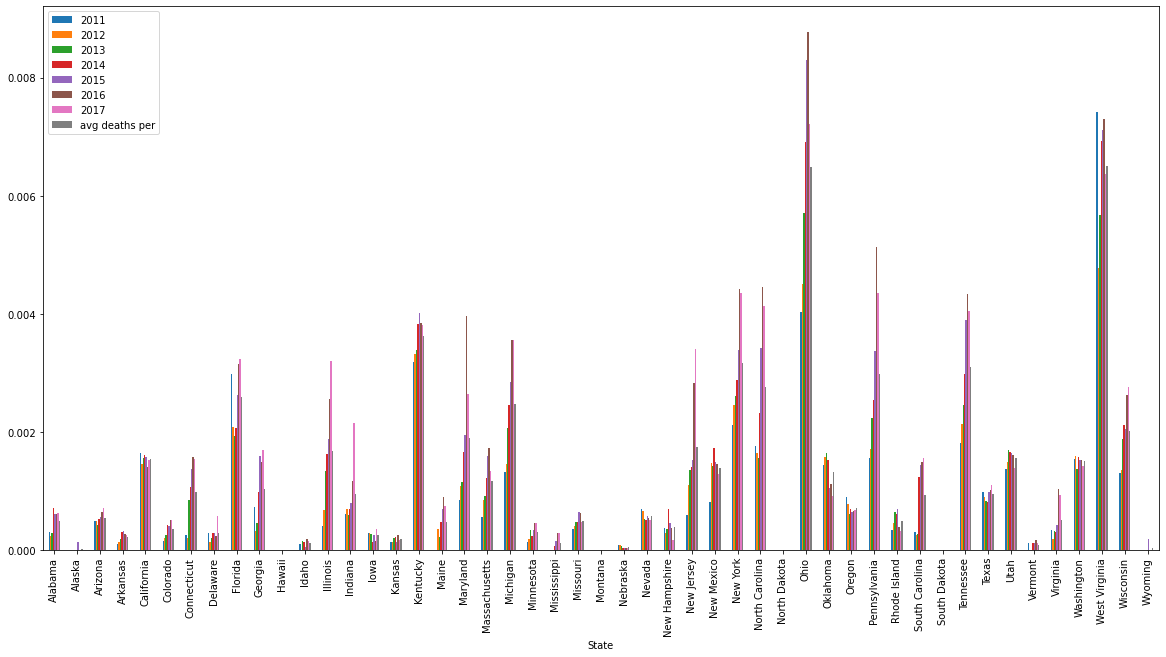

In [41]:
death_per.plot.bar(figsize=(20,10))
# plt.xlim(-1,1)
plt.savefig('Death per State per Year.png')

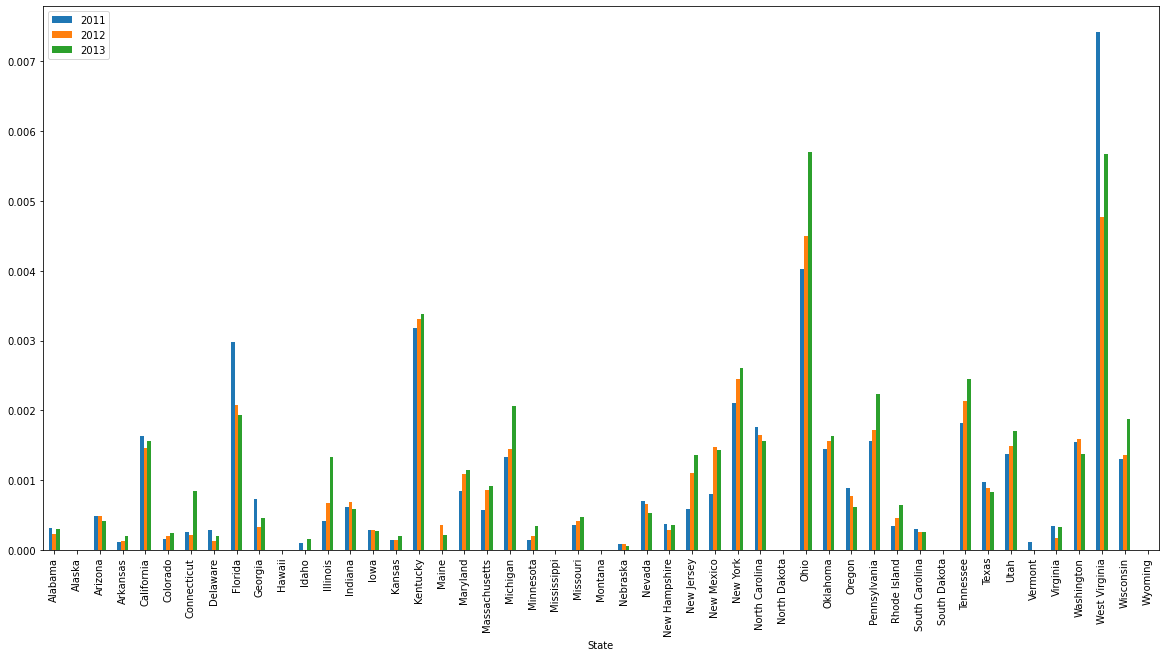

In [42]:
test = pd.DataFrame({'2011': death_per['2011'],
             '2012': death_per['2012'],
                '2013': death_per['2013']})
test.plot(kind='bar', figsize=(20,10))
plt.show()

In [43]:
# yyyticks = []
llabels = ['Florida','Ohio', 'Kentucky', 'West Virginia']
plt.figure(figsize=(20,10))
plt.plot(florida.index, florida['Deaths Per Capita'])
plt.plot(ohio.index, ohio['Deaths Per Capita'])
plt.plot(kentucky.index, kentucky['Deaths Per Capita'])
plt.plot(westVirginia.index, westVirginia['Deaths Per Capita'])
# plt.yticks(yyyticks)
plt.legend(llabels)
plt.show()

NameError: name 'florida' is not defined

<Figure size 1440x720 with 0 Axes>

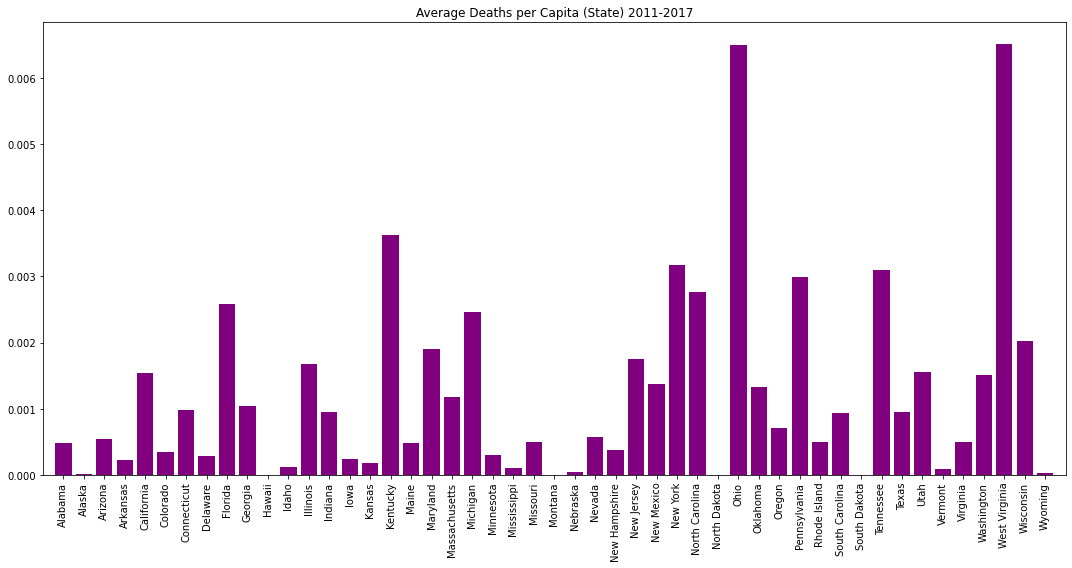

In [49]:
# Average Death Per Capita (State)
plt.figure(figsize=(15, 8))
plt.bar(state_df.index, death_per['avg deaths per'], color='purple')
plt.title('Average Deaths per Capita (State) 2011-2017')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.xlim(-1, 49, -.1)
plt.savefig('Total Deaths per Capita (State) 2011-2017.png')
plt.show()

In [50]:
# # 2011 Death per Capita 
# plt.figure(figsize=(20,10))
# plt.bar(death_per.index, death_per['2011'])
# plt.bar(death_per.index, death_per['2012'])         

# plt.xlim(-1, 49)
# plt.xticks(rotation='vertical')
# plt.title('2011 Deaths per Capita (per State)')
# plt.savefig('2011 Deaths per Capita')
# plt.show()

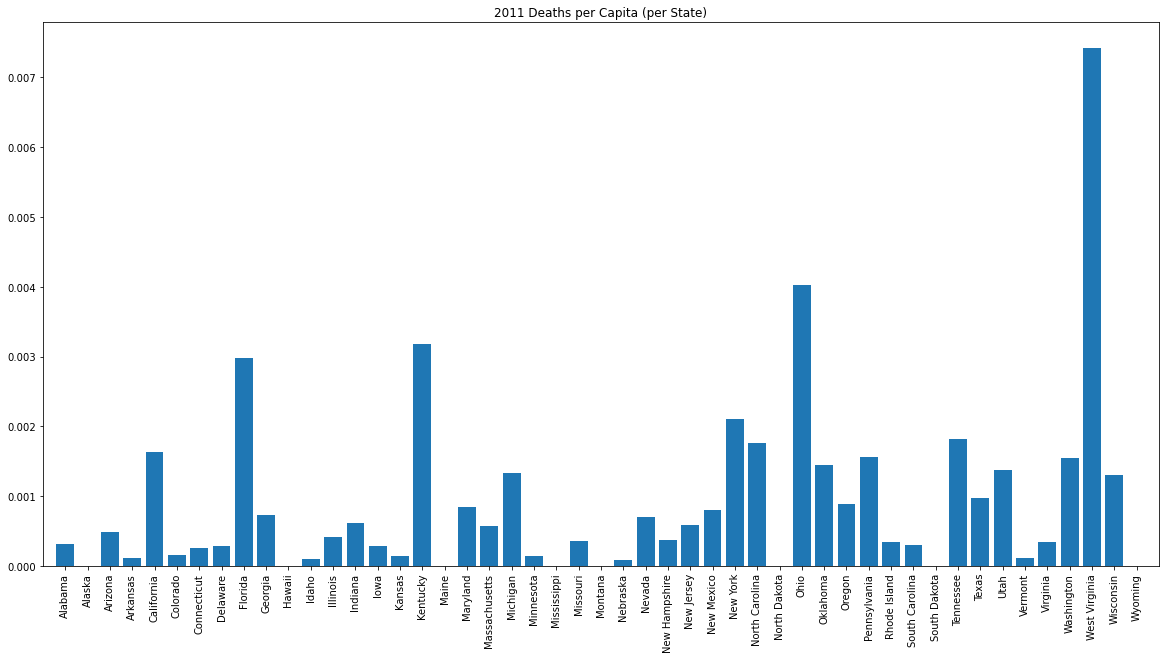

In [51]:
# 2011 Death per Capita 
plt.figure(figsize=(20,10))
plt.bar(death_per.index, death_per['2011'])
plt.xlim(-1, 49)
plt.xticks(rotation='vertical')
plt.title('2011 Deaths per Capita (per State)')
plt.savefig('2011 Deaths per Capita')
plt.show()

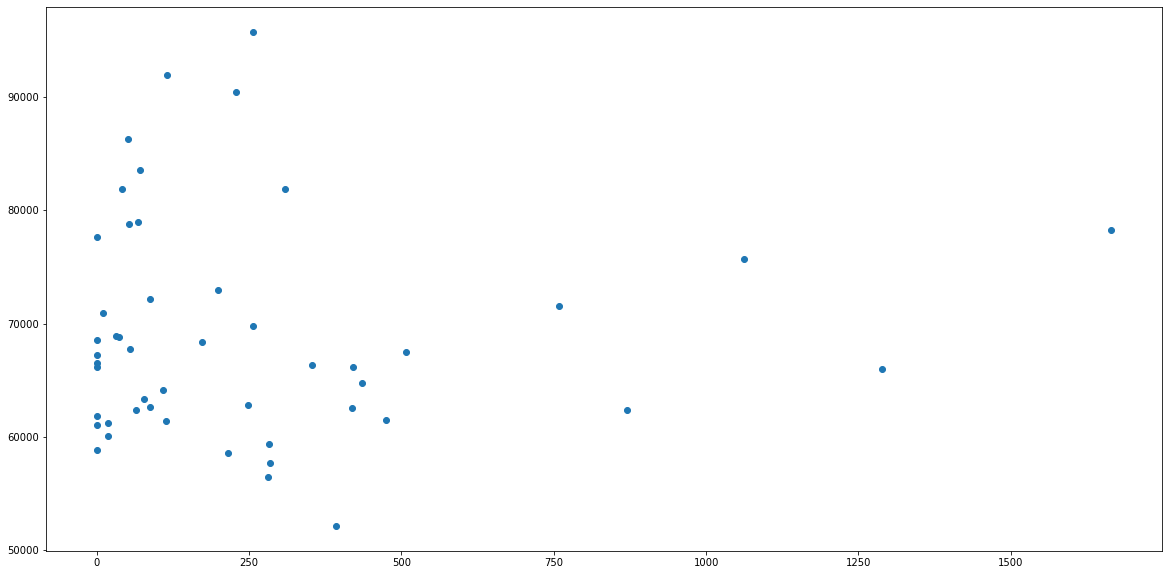

In [52]:
#made a scatter plot of deaths by income, noted there did not appear to be enough data to use a scatter plot for analysis
plt.figure(figsize=(20,10))
plt.scatter(eleven_state, eleven_inc)

# plt.xticks()
plt.show()

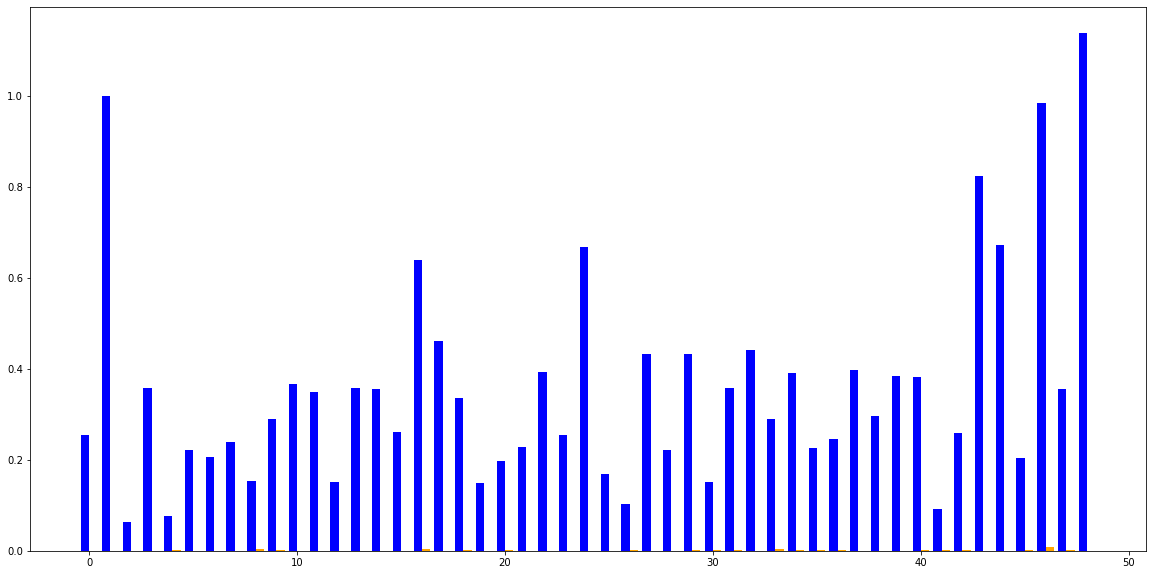

In [53]:
## Trying to figure out a Grouped Bar Chart
plt.figure(figsize=(20,10))
# create data
x = np.arange(len(inc_per['2011']))
y1 = list(inc_per['2011'])
y2 = list(death_per['2011'])
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x+0.2, y2, width, color='orange')


plt.show()

In [54]:
  
# # create data
# x = np.arange(5)
# y1 = [34, 56, 12, 89, 67]
# y2 = [12, 56, 78, 45, 90]
# width = 0.40
  
# # plot data in grouped manner of bar type
# plt.bar(x-0.2, y1, width)
# plt.bar(x+0.2, y2, width)

In [55]:
#Created a illinois df to be able to get a zoomed in look 
illinois = clean_df.loc[(clean_df["State"] == 'Illinois')]
illinois

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density
157,Illinois,Boone,2011,0.0,0.0,0.0,54367.0,280.72,0.0,0.0,...,4457.0,2266.0,12771.0,4924.0,9532.0,11.8,1525553.0,50544,0.0,193.669849
158,Illinois,Champaign,2011,0.0,0.0,0.0,201685.0,996.27,2.3,8.4,...,23145.0,23896.0,25866.0,7898.0,30948.0,7.8,9965196.0,900448,0.0,202.440102
159,Illinois,Cook,2011,0.0,20.0,24.0,5217080.0,945.33,0.9,9.0,...,702595.0,454599.0,846798.0,558624.0,871506.0,10.4,334992169.0,31781061,44.0,5518.792379
160,Illinois,DeKalb,2011,0.0,0.0,0.0,104743.0,631.31,1.0,11.8,...,10603.0,5954.0,17179.0,5167.0,19861.0,9.3,3531746.0,316371,0.0,165.913735
161,Illinois,DuPage,2011,25.0,18.0,0.0,923222.0,327.50,0.3,7.0,...,171348.0,105676.0,120413.0,49466.0,160845.0,8.2,73870349.0,5951598,43.0,2818.998473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,Illinois,Tazewell,2017,0.0,0.0,0.0,133526.0,648.97,0.2,4.1,...,17038.0,7330.0,30198.0,6702.0,32438.0,5.4,8206096.0,238764,0.0,205.750651
4815,Illinois,Vermilion,2017,12.0,0.0,0.0,77909.0,898.37,0.0,9.7,...,5532.0,2339.0,21942.0,6867.0,17145.0,6.5,3285723.0,184370,12.0,86.722620
4816,Illinois,Will,2017,84.0,15.0,0.0,692661.0,836.91,0.1,5.3,...,95679.0,53654.0,119492.0,40819.0,135319.0,5.0,28209374.0,2236225,99.0,827.640965
4817,Illinois,Williamson,2017,0.0,0.0,0.0,67328.0,420.15,0.0,0.0,...,6288.0,4401.0,14273.0,4338.0,18236.0,5.2,2796011.0,324963,0.0,160.247531


In [56]:
# Illinois Death Total throughout study 
illinois_deaths = illinois['Death Total'].sum()
illinois_deaths

5671.0

In [57]:
#created a cook county data frame
cook = clean_df.loc[(clean_df["State"] == 'Illinois') & (clean_df['County'] == 'Cook')]
cook

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density
159,Illinois,Cook,2011,0.0,20.0,24.0,5217080.0,945.33,0.9,9.0,...,702595.0,454599.0,846798.0,558624.0,871506.0,10.4,334992169.0,31781061,44.0,5518.792379
932,Illinois,Cook,2012,27.0,44.0,33.0,5231351.0,945.33,1.1,9.2,...,715158.0,469041.0,836745.0,550149.0,885724.0,9.6,338427304.0,31932614,104.0,5533.888695
1705,Illinois,Cook,2013,301.0,83.0,43.0,5240700.0,945.33,0.9,8.6,...,726485.0,482371.0,842779.0,541355.0,891581.0,9.6,342176485.0,32220427,427.0,5543.778363
2478,Illinois,Cook,2014,339.0,66.0,37.0,5246456.0,945.33,1.0,8.1,...,746058.0,492894.0,846674.0,532846.0,894932.0,7.5,348451260.0,33068212,442.0,5549.867242
3251,Illinois,Cook,2015,368.0,78.0,42.0,5238216.0,945.33,1.1,7.9,...,759678.0,505545.0,847218.0,520304.0,904434.0,6.2,351380397.0,33740484,488.0,5541.150709
4024,Illinois,Cook,2016,546.0,134.0,57.0,5203499.0,945.33,1.1,7.7,...,775888.0,517630.0,839916.0,503252.0,910002.0,6.0,354454887.0,33749362,737.0,5504.425968
4798,Illinois,Cook,2017,682.0,167.0,87.0,5211263.0,945.33,1.1,8.0,...,796547.0,534409.0,841480.0,494411.0,911935.0,5.1,362063569.0,35009779,936.0,5512.638973


In [58]:
#Created a dupage county dataframe
dupage = clean_df.loc[(clean_df["State"] == 'Illinois') & (clean_df['County'] == 'DuPage')]
dupage

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density
161,Illinois,DuPage,2011,25.0,18.0,0.0,923222.0,327.5,0.3,7.0,...,171348.0,105676.0,120413.0,49466.0,160845.0,8.2,73870349.0,5951598,43.0,2818.998473
934,Illinois,DuPage,2012,43.0,13.0,0.0,927987.0,327.5,0.5,8.4,...,173861.0,108098.0,119324.0,49434.0,162970.0,7.5,75354940.0,6047755,56.0,2833.548092
1707,Illinois,DuPage,2013,45.0,0.0,0.0,932126.0,327.5,0.3,7.5,...,176529.0,109697.0,119881.0,48811.0,163837.0,7.4,76840176.0,6269614,45.0,2846.186260
2480,Illinois,DuPage,2014,44.0,17.0,0.0,932708.0,327.5,0.3,7.4,...,177894.0,113375.0,119917.0,48152.0,164259.0,5.8,79834105.0,6473555,61.0,2847.963359
3253,Illinois,DuPage,2015,46.0,23.0,0.0,933736.0,327.5,0.3,7.2,...,177314.0,115852.0,119341.0,47837.0,167138.0,4.8,80271717.0,6620017,69.0,2851.102290
4026,Illinois,DuPage,2016,62.0,24.0,10.0,929368.0,327.5,0.5,6.5,...,180458.0,117315.0,117893.0,47598.0,166117.0,4.7,81750103.0,6742926,96.0,2837.764885
4800,Illinois,DuPage,2017,66.0,32.0,10.0,930128.0,327.5,0.4,6.4,...,183959.0,119948.0,117126.0,48155.0,163724.0,3.9,82596221.0,6920972,108.0,2840.085496


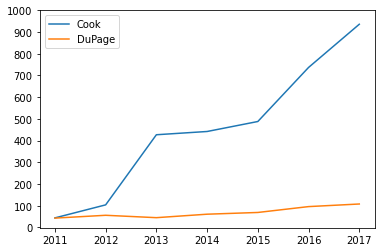

In [59]:
#Created a line graph to compare cook countyand dupage deaths by year
yyticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['Cook','DuPage']
plt.plot(cook['Year'], cook['Death Total'])
plt.plot(dupage['Year'], dupage['Death Total'])
plt.yticks(yyticks)
plt.legend(labels)
plt.show()

In [60]:
#determine illinois deaths per capita
il_deathPer = illinois['Death Total']/illinois['Population']
il_deathPer

157     0.000000
158     0.000000
159     0.000008
160     0.000000
161     0.000047
          ...   
4814    0.000000
4815    0.000154
4816    0.000143
4817    0.000000
4818    0.000232
Length: 154, dtype: float64

In [61]:
death_per2 = clean_df['Death Total']/clean_df['Population']* 100
inc_per2 = clean_df['Income']/clean_df['Population']* 100
gdp_edu_Per2 = clean_df['GDP Education, Health, Social Assistance']/clean_df['GDP Total']* 100
non_us_Per2 = clean_df['Non_US_Born']/clean_df['Population']*100

In [62]:
clean_df['Deaths Per Capita'] = death_per2
clean_df['Income Per Capita'] = inc_per2
clean_df['GDP EHSA Percent of Total'] = gdp_edu_Per2
clean_df['Percent Non-US Born'] = non_us_Per2
clean_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Deaths Per Capita,Income Per Capita,GDP EHSA Percent of Total,Percent Non-US Born
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,39216.0,9.0,5016735.0,478277,0.0,117.448326,0.000000,36.295570,9.533631,2.756578
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,16286.0,9.5,2298846.0,207610,0.0,109.596647,0.000000,63.790106,9.031053,1.964339
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,24325.0,10.0,2801621.0,430563,0.0,194.962523,0.000000,49.212391,15.368353,1.757380
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,131726.0,9.3,39515681.0,4542034,48.0,592.947772,0.007285,10.078293,11.494257,3.176964
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,62801.0,8.3,19512201.0,1135690,12.0,424.295463,0.003528,22.446201,5.820409,4.164523


In [63]:
il_incPer = illinois['Income']/illinois['Population']
il_incPer

157     1.417569
158     0.310316
159     0.014875
160     0.634410
161     0.111886
          ...   
4814    0.586822
4815    0.744099
4816    0.142364
4817    0.939490
4818    0.235885
Length: 154, dtype: float64

In [64]:
illinois['Deaths Per Capita'] = il_deathPer
illinois['Income Per Capita'] = il_incPer
illinois.head()

<ipython-input-64-eb2d40e67661>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illinois['Deaths Per Capita'] = il_deathPer
<ipython-input-64-eb2d40e67661>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illinois['Income Per Capita'] = il_incPer


,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Deaths Per Capita,Income Per Capita
157,Illinois,Boone,2011,0.0,0.0,0.0,54367.0,280.72,0.0,0.0,...,12771.0,4924.0,9532.0,11.8,1525553.0,50544,0.0,193.669849,0.000000,1.417569
158,Illinois,Champaign,2011,0.0,0.0,0.0,201685.0,996.27,2.3,8.4,...,25866.0,7898.0,30948.0,7.8,9965196.0,900448,0.0,202.440102,0.000000,0.310316
159,Illinois,Cook,2011,0.0,20.0,24.0,5217080.0,945.33,0.9,9.0,...,846798.0,558624.0,871506.0,10.4,334992169.0,31781061,44.0,5518.792379,0.000008,0.014875
160,Illinois,DeKalb,2011,0.0,0.0,0.0,104743.0,631.31,1.0,11.8,...,17179.0,5167.0,19861.0,9.3,3531746.0,316371,0.0,165.913735,0.000000,0.634410
161,Illinois,DuPage,2011,25.0,18.0,0.0,923222.0,327.50,0.3,7.0,...,120413.0,49466.0,160845.0,8.2,73870349.0,5951598,43.0,2818.998473,0.000047,0.111886


In [65]:
gdp_eduPer = illinois['GDP Education, Health, Social Assistance']/illinois['GDP Total']* 100
illinois['GDP EHSA Percent of Total'] = gdp_eduPer
illinois.head()

<ipython-input-65-26e7511804e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illinois['GDP EHSA Percent of Total'] = gdp_eduPer


,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Deaths Per Capita,Income Per Capita,GDP EHSA Percent of Total
157,Illinois,Boone,2011,0.0,0.0,0.0,54367.0,280.72,0.0,0.0,...,4924.0,9532.0,11.8,1525553.0,50544,0.0,193.669849,0.000000,1.417569,3.313159
158,Illinois,Champaign,2011,0.0,0.0,0.0,201685.0,996.27,2.3,8.4,...,7898.0,30948.0,7.8,9965196.0,900448,0.0,202.440102,0.000000,0.310316,9.035929
159,Illinois,Cook,2011,0.0,20.0,24.0,5217080.0,945.33,0.9,9.0,...,558624.0,871506.0,10.4,334992169.0,31781061,44.0,5518.792379,0.000008,0.014875,9.487106
160,Illinois,DeKalb,2011,0.0,0.0,0.0,104743.0,631.31,1.0,11.8,...,5167.0,19861.0,9.3,3531746.0,316371,0.0,165.913735,0.000000,0.634410,8.957921
161,Illinois,DuPage,2011,25.0,18.0,0.0,923222.0,327.50,0.3,7.0,...,49466.0,160845.0,8.2,73870349.0,5951598,43.0,2818.998473,0.000047,0.111886,8.056816


In [66]:
non_usPer = illinois['Non_US_Born']/illinois['Population']*100
non_usPer

157      8.963158
158      7.225128
159     17.956309
160      5.274816
161     15.438324
          ...    
4814     1.661849
4815     1.950994
4816    10.688778
4817     1.409518
4818     6.978067
Length: 154, dtype: float64

In [67]:
illinois['Percent Non-US Born'] = non_usPer
illinois.head()

<ipython-input-67-6806ecb2899b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illinois['Percent Non-US Born'] = non_usPer


,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Deaths Per Capita,Income Per Capita,GDP EHSA Percent of Total,Percent Non-US Born
157,Illinois,Boone,2011,0.0,0.0,0.0,54367.0,280.72,0.0,0.0,...,9532.0,11.8,1525553.0,50544,0.0,193.669849,0.000000,1.417569,3.313159,8.963158
158,Illinois,Champaign,2011,0.0,0.0,0.0,201685.0,996.27,2.3,8.4,...,30948.0,7.8,9965196.0,900448,0.0,202.440102,0.000000,0.310316,9.035929,7.225128
159,Illinois,Cook,2011,0.0,20.0,24.0,5217080.0,945.33,0.9,9.0,...,871506.0,10.4,334992169.0,31781061,44.0,5518.792379,0.000008,0.014875,9.487106,17.956309
160,Illinois,DeKalb,2011,0.0,0.0,0.0,104743.0,631.31,1.0,11.8,...,19861.0,9.3,3531746.0,316371,0.0,165.913735,0.000000,0.634410,8.957921,5.274816
161,Illinois,DuPage,2011,25.0,18.0,0.0,923222.0,327.50,0.3,7.0,...,160845.0,8.2,73870349.0,5951598,43.0,2818.998473,0.000047,0.111886,8.056816,15.438324


In [68]:
above_high = clean_df['Bachelor_Degree']+clean_df['Grad_Degree']+clean_df['Associates_Degree']
high_orBelow = clean_df['Less_Than_HS']+clean_df['HS_Grad']
clean_df['> High School'] = above_high
clean_df['<= High School'] = high_orBelow
clean_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Deaths Per Capita,Income Per Capita,GDP EHSA Percent of Total,Percent Non-US Born,> High School,<= High School
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,5016735.0,478277,0.0,117.448326,0.000000,36.295570,9.533631,2.756578,73085.0,51365.0
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,2298846.0,207610,0.0,109.596647,0.000000,63.790106,9.031053,1.964339,24033.0,30671.0
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,2801621.0,430563,0.0,194.962523,0.000000,49.212391,15.368353,1.757380,35237.0,36003.0
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,39515681.0,4542034,48.0,592.947772,0.007285,10.078293,11.494257,3.176964,258540.0,179455.0
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,19512201.0,1135690,12.0,424.295463,0.003528,22.446201,5.820409,4.164523,143931.0,72992.0


In [69]:
above_highIl = illinois['Bachelor_Degree']+illinois['Grad_Degree']+illinois['Associates_Degree']
high_orBelowIl = illinois['Less_Than_HS']+illinois['HS_Grad']
illinois['> High School'] = above_highIl
illinois['<= High School'] = high_orBelowIl
illinois.head()

<ipython-input-69-9402696f2741>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illinois['> High School'] = above_highIl
<ipython-input-69-9402696f2741>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illinois['<= High School'] = high_orBelowIl


,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Deaths Per Capita,Income Per Capita,GDP EHSA Percent of Total,Percent Non-US Born,> High School,<= High School
157,Illinois,Boone,2011,0.0,0.0,0.0,54367.0,280.72,0.0,0.0,...,1525553.0,50544,0.0,193.669849,0.000000,1.417569,3.313159,8.963158,16255.0,17695.0
158,Illinois,Champaign,2011,0.0,0.0,0.0,201685.0,996.27,2.3,8.4,...,9965196.0,900448,0.0,202.440102,0.000000,0.310316,9.035929,7.225128,77989.0,33764.0
159,Illinois,Cook,2011,0.0,20.0,24.0,5217080.0,945.33,0.9,9.0,...,334992169.0,31781061,44.0,5518.792379,0.000008,0.014875,9.487106,17.956309,2028700.0,1405422.0
160,Illinois,DeKalb,2011,0.0,0.0,0.0,104743.0,631.31,1.0,11.8,...,3531746.0,316371,0.0,165.913735,0.000000,0.634410,8.957921,5.274816,36418.0,22346.0
161,Illinois,DuPage,2011,25.0,18.0,0.0,923222.0,327.50,0.3,7.0,...,73870349.0,5951598,43.0,2818.998473,0.000047,0.111886,8.056816,15.438324,437869.0,169879.0


In [70]:
for col in clean_df.columns:
    print(col)

State
County
Year
Heroin
Other
Methadone
Population
LandArea
Bike
Carpool
Alone
Public
Walk
Home
Income
Non_US_Born
Bachelor_Degree
Grad_Degree
HS_Grad
Less_Than_HS
Associates_Degree
Unemployment
GDP Total
GDP Education, Health, Social Assistance
Death Total
Population Density
Deaths Per Capita
Income Per Capita
GDP EHSA Percent of Total
Percent Non-US Born
> High School
<= High School


In [71]:
combined_df

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,...,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,67770.0,5147.0,...,5016735.0,478277,0.0,117.448326,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,51374.0,1582.0,...,2298846.0,207610,0.0,109.596647,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,51330.0,1833.0,...,2801621.0,430563,0.0,194.962523,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,66409.0,20934.0,...,39515681.0,4542034,48.0,592.947772,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,76342.0,14164.0,...,19512201.0,1135690,12.0,424.295463,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,Wisconsin,Washington,2017,0.0,12.0,0.0,135101.0,430.70,89470.0,2956.0,...,5636773.0,476010,12.0,313.677734,93734.0,21.674099,8.029104,30.188619,5.580686,34.527493
5408,Wisconsin,Waukesha,2017,27.0,27.0,0.0,400621.0,549.57,105275.0,17376.0,...,28028503.0,2927629,54.0,728.971742,277757.0,28.266074,14.650576,23.609126,3.997739,29.476485
5409,Wisconsin,Winnebago,2017,0.0,0.0,0.0,170414.0,434.49,71572.0,4719.0,...,9274302.0,649081,0.0,392.216161,113634.0,19.547847,7.777602,34.327754,7.637679,30.709119
5410,Wyoming,Fremont,2017,0.0,0.0,0.0,39803.0,9183.81,70101.0,469.0,...,1595939.0,138479,0.0,4.334040,26781.0,15.525933,7.740562,31.727717,8.890631,36.115156


In [72]:
combined_df['death per capita'] = combined_df['Death Total']/combined_df['Population']
combined_df['Income Per Capita'] = combined_df['Income']/combined_df['Population']
combined_df['Percent Non-US Born'] = combined_df['Non_US_Born']/combined_df['Population']*100
combined_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,...,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,67770.0,5147.0,...,117.448326,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450,0.000000,0.362956,2.756578
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,51374.0,1582.0,...,109.596647,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132,0.000000,0.637901,1.964339
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,51330.0,1833.0,...,194.962523,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143,0.000000,0.492124,1.757380
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,66409.0,20934.0,...,592.947772,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773,0.000073,0.100783,3.176964
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,76342.0,14164.0,...,424.295463,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826,0.000035,0.224462,4.164523


In [73]:
#Determine the quantiles of the income data
quartiles = incomes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lowerq)
print(upper_bound)

57848.75
106492.5


In [74]:
#loc to find all values that were in the Q1 and all values that were above the upper bounds
lowest_inc = combined_df.loc[combined_df['Income']<lowerq]
highest_inc = combined_df.loc[combined_df['Income']>upper_bound]

#get a lsit of the deaths per capita for each df
lowest_inc_deaths = lowest_inc['death per capita']
highest_inc_deaths = highest_inc['death per capita']

#perform independent ttest, pvalue = < 0.05 thus we can reject the null hypothesis
st.ttest_ind(highest_inc_deaths,lowest_inc_deaths, equal_var=False )

Ttest_indResult(statistic=-3.1423360546381573, pvalue=0.0017202124823795916)

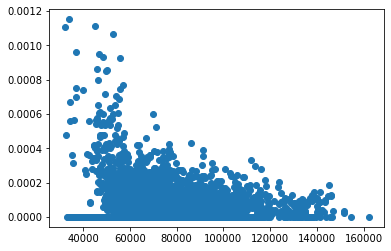

In [75]:
plt.scatter(combined_df['Income'], combined_df['death per capita'])

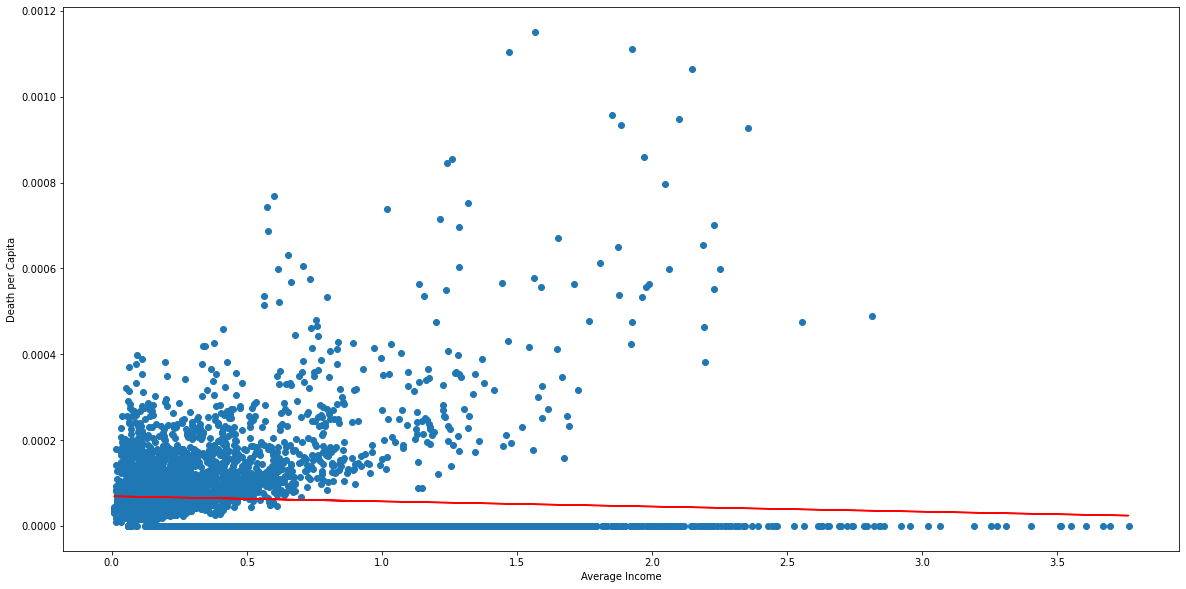

The r-value is : 0.0034573737873389208


In [76]:
x_values_income = combined_df['Income Per Capita']
y_values_death = combined_df['death per capita']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_income , y_values_death)
regress_values = x_values_income  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,10))
plt.scatter(x_values_income , y_values_death)
plt.plot(x_values_income , regress_values, "r-")
# plt.annotate(line_eq, fontsize=15, color = 'red')
plt.xlabel('Average Income')
plt.ylabel('Death per Capita')
plt.show()
print(f"The r-value is : {rvalue**2}")

In [77]:
lowest_inc_drugs = lowest_inc[['Methadone', 'Heroin', 'Other']].sum()
print(lowest_inc_drugs )
highest_inc_drugs = highest_inc[['Methadone', 'Heroin', 'Other']].sum()
print(highest_inc_drugs )

Methadone     559.0
Heroin       2889.0
Other        5843.0
dtype: float64
Methadone    1106.0
Heroin       6169.0
Other        5110.0
dtype: float64


Text(0.5, 1.0, 'Death by Drug Type for the  Highest Income')

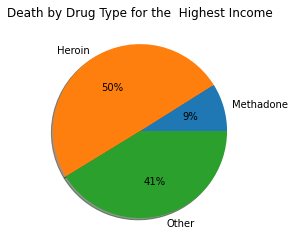

In [78]:
labels = ['Methadone', 'Heroin', 'Other']
plt.pie(highest_inc_drugs, labels=labels, shadow = True, autopct = '%1.0f%%')
plt.title('Death by Drug Type for the  Highest Income')

Text(0.5, 1.0, 'Death by Drug Type for the Lowest Income')

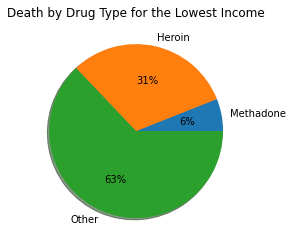

In [79]:
plt.pie(lowest_inc_drugs, labels=labels,shadow = True, autopct = '%1.0f%%')
plt.title('Death by Drug Type for the Lowest Income')

In [80]:
combined_df['% above HS ']=combined_df[['Grad %', 'Bachelors %','Associates %'] ].sum(axis = 1)
combined_df

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,...,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born,% above HS
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,67770.0,5147.0,...,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450,0.000000,0.362956,2.756578,58.726396
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,51374.0,1582.0,...,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132,0.000000,0.637901,1.964339,43.932802
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,51330.0,1833.0,...,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143,0.000000,0.492124,1.757380,49.462381
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,66409.0,20934.0,...,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773,0.000073,0.100783,3.176964,59.028071
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,76342.0,14164.0,...,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826,0.000035,0.224462,4.164523,66.351194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,Wisconsin,Washington,2017,0.0,12.0,0.0,135101.0,430.70,89470.0,2956.0,...,93734.0,21.674099,8.029104,30.188619,5.580686,34.527493,0.000089,0.662245,2.187993,64.230695
5408,Wisconsin,Waukesha,2017,27.0,27.0,0.0,400621.0,549.57,105275.0,17376.0,...,277757.0,28.266074,14.650576,23.609126,3.997739,29.476485,0.000135,0.262780,4.337266,72.393135
5409,Wisconsin,Winnebago,2017,0.0,0.0,0.0,170414.0,434.49,71572.0,4719.0,...,113634.0,19.547847,7.777602,34.327754,7.637679,30.709119,0.000000,0.419989,2.769139,58.034567
5410,Wyoming,Fremont,2017,0.0,0.0,0.0,39803.0,9183.81,70101.0,469.0,...,26781.0,15.525933,7.740562,31.727717,8.890631,36.115156,0.000000,1.761199,1.178303,59.381651


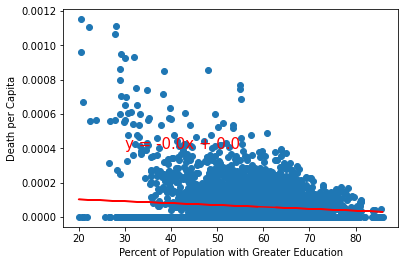

The r-value is : 0.011856167020053184


In [81]:
#am I doing this wrong or is there no correlation?? I dont think there is  will need a different form of analysis an chart
x_values_aboveHS = combined_df['% above HS ']
y_values_deathHS = combined_df['death per capita']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_aboveHS , y_values_deathHS)
regress_values = x_values_aboveHS  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_aboveHS , y_values_deathHS)
plt.plot(x_values_aboveHS , regress_values, "r-")
plt.annotate(line_eq,(30, 0.0004), fontsize=15, color = 'red')
plt.xlabel('Percent of Population with Greater Education')
plt.ylabel('Death per Capita')
plt.show()
print(f"The r-value is : {rvalue**2}")

In [82]:
# xx_nonUSborn = combined_df['Percent Non-US Born']
# y_values_death = combined_df['death per capita']

# plt.figure(figsize=(20,10))
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(xx_nonUSborn , y_values_death)
# regress_values = x_values_income  *slope +intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.figure(figsize=(20,10))
# plt.scatter(xx_nonUSborn, y_values_death)
# plt.plot(xx_nonUSborn , regress_values, "r-")
# # plt.annotate(line_eq, fontsize=15, color = 'red')
# plt.xlabel('Percent of Non US Born')
# plt.ylabel('Death per Capita')
# plt.show()
# print(f"The r-value is : {rvalue**2}")

In [83]:
def state_info(state_name):
    state = combined_df.loc[combined_df['State'] == state_name]
    state = state.groupby('Year').sum()
    return state 

In [84]:
NY = state_info('New York')
NY    

,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",...,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born,% above HS
Year,,,,,,,,,,,,,,,,,,,,,
2011,268.0,536.0,258.0,18107440.0,22460.38,2724130.0,3601175.0,291.4,1.275676e+09,117405250,...,12078245.0,588.375573,465.789609,1102.315772,452.509563,991.009482,0.001243,15.590899,344.895461,2045.174664
2012,446.0,505.0,290.0,18215324.0,22460.38,2759033.0,3665036.0,299.4,1.272006e+09,118839768,...,12178224.0,592.477110,471.114674,1082.285766,442.642248,1011.480201,0.001209,15.827292,348.772117,2075.071985
2013,581.0,531.0,214.0,18302166.0,22460.38,2792437.0,3722150.0,267.0,1.301721e+09,119251744,...,12285257.0,600.150923,478.181616,1073.636975,433.550988,1014.479499,0.001536,16.121222,352.876329,2092.812037
2014,758.0,522.0,194.0,18404035.0,22460.38,2828743.0,3791660.0,218.1,1.324770e+09,135097124,...,12404035.0,606.267509,486.790840,1067.987070,423.125670,1015.828911,0.002063,16.338999,356.501512,2108.887260
2015,960.0,602.0,175.0,18462055.0,22460.38,2853359.0,3852271.0,188.1,1.342207e+09,139095087,...,12511617.0,613.288818,492.331579,1063.952496,411.305788,1019.121318,0.002332,16.541671,360.414480,2124.741716
2016,1221.0,782.0,256.0,18420085.0,22460.38,2929767.0,3882327.0,174.0,1.370260e+09,129509199,...,12581222.0,622.855706,500.284330,1054.429502,403.220471,1019.209991,0.003282,17.040204,363.721918,2142.350027
2017,1280.0,738.0,220.0,18528779.0,22460.38,3044748.0,3942989.0,175.5,1.387281e+09,149356643,...,12739174.0,634.337327,508.704397,1048.885602,395.882831,1012.189843,0.003456,17.672349,367.847522,2155.231567


In [85]:
florida = state_info('Florida')
florida

,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",...,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born,% above HS
Year,,,,,,,,,,,,,,,,,,,,,
2011,27.0,910.0,351.0,15131525.0,30968.25,2309120.0,1875859.0,358.8,615925803.0,62939376,...,10316136.0,555.594867,314.148217,1090.516954,447.772209,1091.967752,0.002262,10.863866,320.245034,1961.710837
2012,19.0,698.0,195.0,15344101.0,30968.25,2290008.0,1920614.0,303.9,626041830.0,63865503,...,10445287.0,558.675369,316.405282,1078.288083,441.787446,1104.843820,0.001478,10.684271,321.884632,1979.924471
2013,79.0,613.0,168.0,15537378.0,30968.25,2276505.0,1963220.0,258.5,642705654.0,65439509,...,10586576.0,561.090944,319.958080,1075.700051,432.564711,1110.686214,0.001313,10.504750,322.981741,1991.735238
2014,247.0,576.0,110.0,15808767.0,30968.25,2304482.0,2028442.0,223.2,671167936.0,68676607,...,10768142.0,567.387777,327.376436,1073.373877,420.690593,1111.171317,0.001481,10.515363,325.871450,2005.935530
2015,442.0,650.0,121.0,16130722.0,30968.25,2328476.0,2088491.0,194.7,692872506.0,70568274,...,10973466.0,578.093273,333.926553,1069.791765,403.461180,1114.727228,0.002033,10.435003,327.455541,2026.747054
2016,496.0,869.0,115.0,16425109.0,30968.25,2395451.0,2148538.0,171.1,715835432.0,72151668,...,11191729.0,589.532080,341.330194,1058.166342,394.789697,1116.181687,0.002412,10.561153,329.466839,2047.043961
2017,516.0,963.0,67.0,16730765.0,30968.25,2495488.0,2234255.0,149.3,739543222.0,75690104,...,11436947.0,601.389075,349.609252,1051.646037,378.334675,1119.020960,0.002408,10.848703,334.852077,2070.019288


In [86]:
ohio = state_info('Ohio')
ohio

,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",...,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born,% above HS
Year,,,,,,,,,,,,,,,,,,,,,
2011,335.0,464.0,71.0,9924209.0,22210.42,2868664.0,347806.0,431.5,480568860.0,49898742,...,6597897.0,617.903696,362.472980,1770.732837,576.203722,1272.686765,0.002162,26.786587,95.336478,2253.063441
2012,551.0,371.0,49.0,9928591.0,22210.42,2895622.0,352612.0,360.2,487287140.0,50765270,...,6622285.0,627.043895,363.873771,1754.014497,552.706832,1302.361005,0.002118,27.169713,96.780495,2293.278671
2013,828.0,362.0,45.0,9957397.0,22210.42,2910535.0,360816.0,364.4,502895669.0,51274215,...,6652075.0,633.775208,370.568127,1745.502650,540.719640,1309.434375,0.003001,27.297046,98.152655,2313.777710
2014,1030.0,447.0,21.0,9981881.0,22210.42,2953664.0,367672.0,280.5,505837851.0,52481040,...,6684092.0,646.173402,378.454087,1732.750743,526.870255,1315.751513,0.004333,27.704783,99.329243,2340.379002
2015,1258.0,501.0,44.0,10003574.0,22210.42,2990827.0,374107.0,238.2,509128704.0,60006618,...,6718907.0,656.433537,384.825524,1720.494320,508.348159,1329.898459,0.005747,28.044225,100.541830,2371.157520
2016,1268.0,613.0,27.0,10008735.0,22210.42,3074471.0,381269.0,243.4,517008790.0,60253597,...,6749410.0,669.886960,393.580449,1704.333889,492.728742,1339.469960,0.005156,28.874049,102.185282,2402.937369
2017,843.0,677.0,57.0,10053965.0,22210.42,3195871.0,396189.0,237.9,526897955.0,54710301,...,6789975.0,681.622635,405.281055,1696.035190,481.547795,1335.513326,0.003766,29.972971,105.045817,2422.417015


In [87]:
kentucky = state_info('Kentucky')
kentucky

,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",...,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born,% above HS
Year,,,,,,,,,,,,,,,,,,,,,
2011,36.0,245.0,0.0,2560788.0,9996.87,1636467.0,77164.0,283.8,119581634.0,12275857,...,1678216.0,320.892502,223.450263,1001.989998,592.633634,761.033604,0.004840,35.587453,45.531764,1305.376368
2012,113.0,181.0,0.0,2571885.0,9996.87,1657517.0,79887.0,259.4,121601630.0,12126200,...,1694184.0,327.968322,226.187195,1001.790495,561.591028,782.462961,0.003093,36.192316,45.375042,1336.618477
2013,168.0,134.0,0.0,2587043.0,9996.87,1673176.0,82617.0,267.5,122544149.0,11841422,...,1708337.0,337.584956,231.350997,1000.546307,538.104954,792.412786,0.002559,36.582860,46.395791,1361.348739
2014,169.0,174.0,0.0,2600321.0,9996.87,1689258.0,86252.0,212.9,123987974.0,12594465,...,1722050.0,343.657843,233.367930,993.405902,525.363553,804.204772,0.002928,36.828183,47.943728,1381.230545
2015,208.0,154.0,0.0,2611801.0,9996.87,1704292.0,88134.0,180.7,125665226.0,12719965,...,1735495.0,348.472616,241.483853,993.064208,510.461162,806.518162,0.002849,36.636284,49.668677,1396.474631
2016,193.0,155.0,0.0,2621469.0,9996.87,1748455.0,89365.0,188.1,127603936.0,12970962,...,1746239.0,358.536212,243.969612,987.983842,493.944040,815.566295,0.002037,37.430609,49.130127,1418.072118
2017,165.0,181.0,0.0,2635753.0,9996.87,1824446.0,94038.0,167.0,129924029.0,13566894,...,1760418.0,365.517476,249.662478,976.222296,481.737655,826.860094,0.001908,39.108049,52.205372,1442.040049


In [88]:
westVirginia = state_info('West Virginia')
westVirginia

,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",...,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born,% above HS
Year,,,,,,,,,,,,,,,,,,,,,
2011,0.0,393.0,0.0,1377368.0,11173.26,1354769.0,15916.0,219.5,55396534.0,6514006,...,947855.0,262.277530,162.863281,1066.194783,493.188799,615.475607,0.009025,34.958014,21.511412,1040.616418
2012,12.0,241.0,0.0,1378289.0,11173.26,1381029.0,16839.0,211.4,55547762.0,6512506,...,952242.0,266.498114,165.275086,1063.013096,471.063916,634.149787,0.004735,35.747921,23.539620,1065.922988
2013,66.0,235.0,0.0,1377762.0,11173.26,1407947.0,17610.0,198.6,54229961.0,7022082,...,955384.0,271.941139,167.390314,1061.017817,458.642497,641.008233,0.005368,36.578403,25.456454,1080.339686
2014,81.0,285.0,0.0,1374732.0,11173.26,1423821.0,18543.0,197.3,53306129.0,7138396,...,957536.0,278.871423,169.901176,1066.381398,440.408776,644.437227,0.006852,37.248963,27.412825,1093.209826
2015,115.0,260.0,0.0,1370576.0,11173.26,1428538.0,19199.0,197.6,52687032.0,7081952,...,957402.0,280.712342,174.976306,1064.838267,426.946135,652.526950,0.006510,37.585257,27.790919,1108.215599
2016,165.0,217.0,0.0,1360490.0,11173.26,1461050.0,20081.0,180.7,53395273.0,7453235,...,957441.0,285.643715,179.752632,1058.297817,414.426517,661.879319,0.005196,38.777401,30.246935,1127.275666
2017,156.0,174.0,0.0,1348552.0,11173.26,1499087.0,20380.0,148.0,54256693.0,7272286,...,955042.0,287.080161,184.324516,1062.946648,399.391847,666.256828,0.004751,40.100772,31.133320,1137.661505


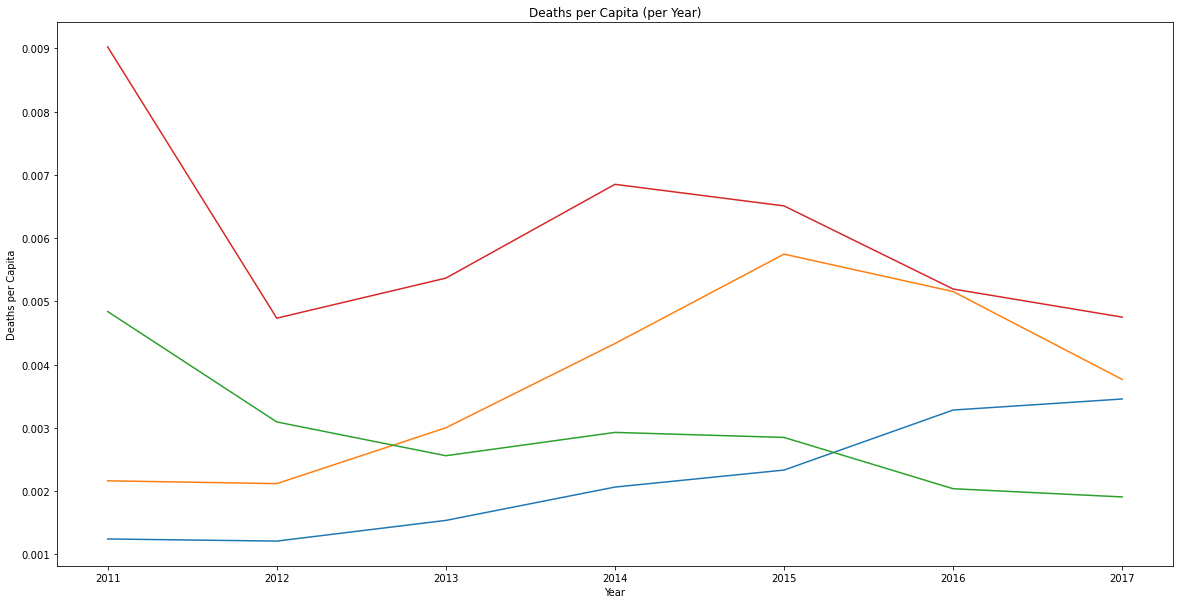

In [90]:
# yyyticks = []
# llabels = ['Florida','Ohio', 'Kentucky', 'West Virginia']
plt.figure(figsize=(20,10))
plt.plot(NY.index, NY['death per capita'])
plt.plot(ohio.index, ohio['death per capita'])
plt.plot(kentucky.index, kentucky['death per capita'])
plt.plot(westVirginia.index, westVirginia['death per capita'])
plt.ylabel('Deaths per Capita')
plt.xlabel('Year')
plt.title('Deaths per Capita (per Year)')
# plt.yticks(yyyticks)
# plt.legend(llabels, fontsize='large')
plt.savefig('Deaths per Capita (per Year).png')
plt.show()

In [82]:
combined_df

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,...,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %,death per capita,Income Per Capita,Percent Non-US Born,% above HS
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,67770.0,5147.0,...,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450,0.000000,0.362956,2.756578,58.726396
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,51374.0,1582.0,...,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132,0.000000,0.637901,1.964339,43.932802
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,51330.0,1833.0,...,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143,0.000000,0.492124,1.757380,49.462381
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,66409.0,20934.0,...,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773,0.000073,0.100783,3.176964,59.028071
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,76342.0,14164.0,...,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826,0.000035,0.224462,4.164523,66.351194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,Wisconsin,Washington,2017,0.0,12.0,0.0,135101.0,430.70,89470.0,2956.0,...,93734.0,21.674099,8.029104,30.188619,5.580686,34.527493,0.000089,0.662245,2.187993,64.230695
5408,Wisconsin,Waukesha,2017,27.0,27.0,0.0,400621.0,549.57,105275.0,17376.0,...,277757.0,28.266074,14.650576,23.609126,3.997739,29.476485,0.000135,0.262780,4.337266,72.393135
5409,Wisconsin,Winnebago,2017,0.0,0.0,0.0,170414.0,434.49,71572.0,4719.0,...,113634.0,19.547847,7.777602,34.327754,7.637679,30.709119,0.000000,0.419989,2.769139,58.034567
5410,Wyoming,Fremont,2017,0.0,0.0,0.0,39803.0,9183.81,70101.0,469.0,...,26781.0,15.525933,7.740562,31.727717,8.890631,36.115156,0.000000,1.761199,1.178303,59.381651


In [109]:
death_per_reduced = death_per[['2011']].copy()
death_per_reduced.sort_values('2011', inplace=True, ascending=False)


,2011
State,
West Virginia,0.007418
Ohio,0.004033
Kentucky,0.003182
Florida,0.002979
New York,0.002111
Tennessee,0.001814
North Carolina,0.001762
California,0.001638
Pennsylvania,0.001561


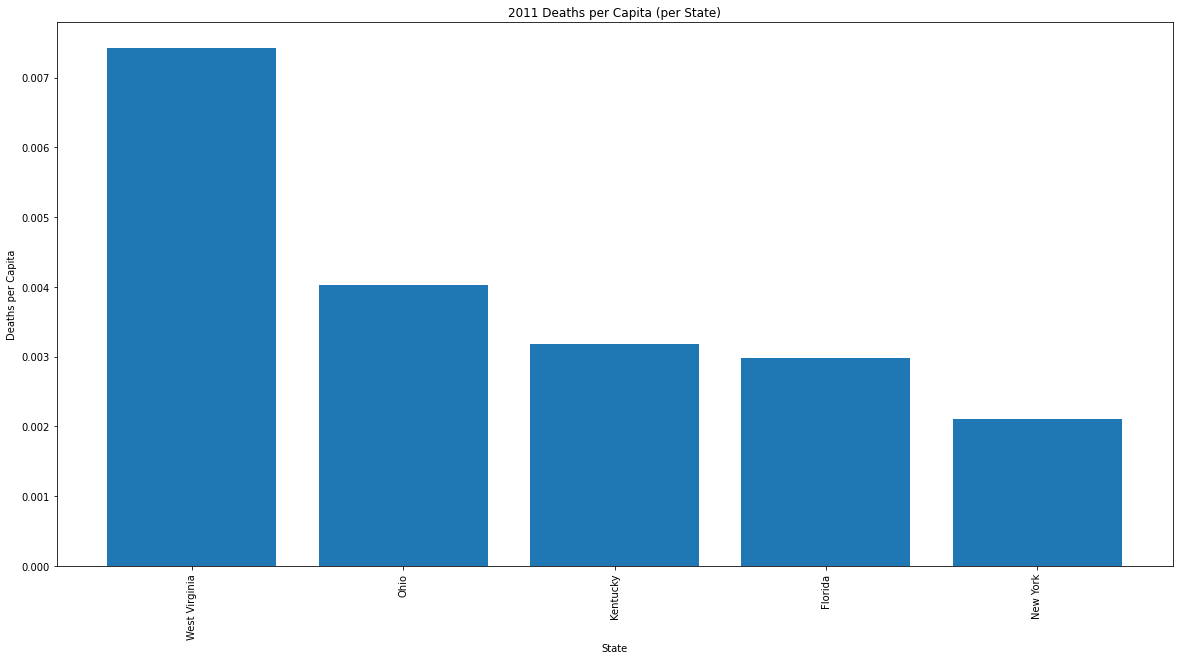

In [116]:
import collections
# 2011 Death per Capita 
plt.figure(figsize=(20,10))
plt.bar(death_per_reduced.iloc[:5].index, death_per_reduced.iloc[:5]['2011'])
# plt.xlim(-1, 49)
plt.xticks(rotation='vertical')
plt.xlabel('State')
plt.ylabel('Deaths per Capita')
# collections.sort()
plt.title('2011 Deaths per Capita (per State)')
plt.savefig('2011 Deaths per Capita')
plt.show()

In [91]:
low_pop = lowest_inc.groupby(['Year'])['Population'].mean()
high_pop = highest_inc.groupby(['Year'])['Population'].mean()

In [92]:
low_her = lowest_inc.groupby(['Year'])['Heroin'].sum()
low_herPer = low_her/low_pop
low_oth = lowest_inc.groupby(['Year'])['Other'].sum()
low_othPer = low_oth/low_pop
low_meth = lowest_inc.groupby(['Year'])['Methadone'].sum()
low_methPer = low_meth/low_pop
high_her = highest_inc.groupby(['Year'])['Heroin'].sum()
high_herPer = high_her/high_pop
high_oth = highest_inc.groupby(['Year'])['Other'].sum()
high_othPer = high_oth/high_pop
high_meth = highest_inc.groupby(['Year'])['Methadone'].sum()
high_methPer = high_meth/high_pop
low_all_drugs = pd.DataFrame({'Heroin':low_herPer,'Other':low_othPer,'Methadone':low_methPer})
high_all_drugs = pd.DataFrame({'Heroin':high_herPer,'Other':high_othPer,'Methadone':high_methPer})
low_all_drugs

,Heroin,Other,Methadone
Year,,,
2011,0.001816,0.009557,0.000810
2012,0.002368,0.006684,0.001188
2013,0.003442,0.007024,0.000873
2014,0.003208,0.009102,0.000577
2015,0.006338,0.008908,0.000492
2016,0.005261,0.007155,0.000458
2017,0.004291,0.004107,0.000587


In [93]:
high_all_drugs

,Heroin,Other,Methadone
Year,,,
2011,0.000368,0.000783,0.000161
2012,0.000713,0.000754,0.000249
2013,0.000859,0.000837,0.000230
2014,0.001220,0.000961,0.000229
2015,0.001515,0.001017,0.000122
2016,0.002158,0.001616,0.000393
2017,0.002518,0.001853,0.000309


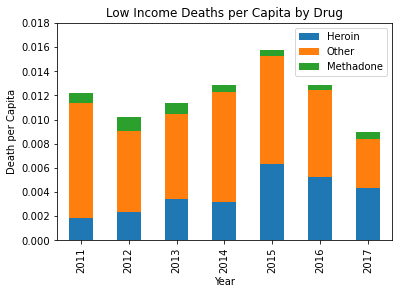

In [94]:
low_all_drugs.plot(kind='bar', stacked=True, ylim=(0,.018))
plt.ylabel('Death per Capita')
plt.title('Low Income Deaths per Capita by Drug')
plt.savefig('Deaths per Capita by Drug Low Income')

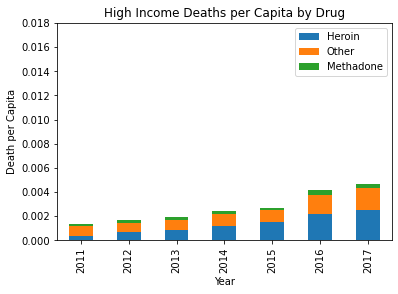

In [95]:
high_all_drugs.plot(kind='bar', stacked=True, ylim=(0,.018))
plt.ylabel('Death per Capita')
plt.title('High Income Deaths per Capita by Drug')
plt.savefig('Deaths per Capita by Drug High Income')

In [96]:
low_inc = pd.DataFrame(lowest_inc.groupby(['Year'])['death per capita'].sum()).T
low_inc.rename(index={'death per capita':'Low Income'},inplace=True)
high_inc = pd.DataFrame(highest_inc.groupby(['Year'])['death per capita'].sum()).T
high_inc.rename(index={'death per capita':'High Income'},inplace=True)
inc_death = pd.concat([low_inc,high_inc])
inc_death

Year,2011,2012,2013,2014,2015,2016,2017
Low Income,0.019727,0.011079,0.011975,0.015313,0.016597,0.012185,0.007542
High Income,0.000731,0.001098,0.001335,0.001756,0.001957,0.003871,0.004191


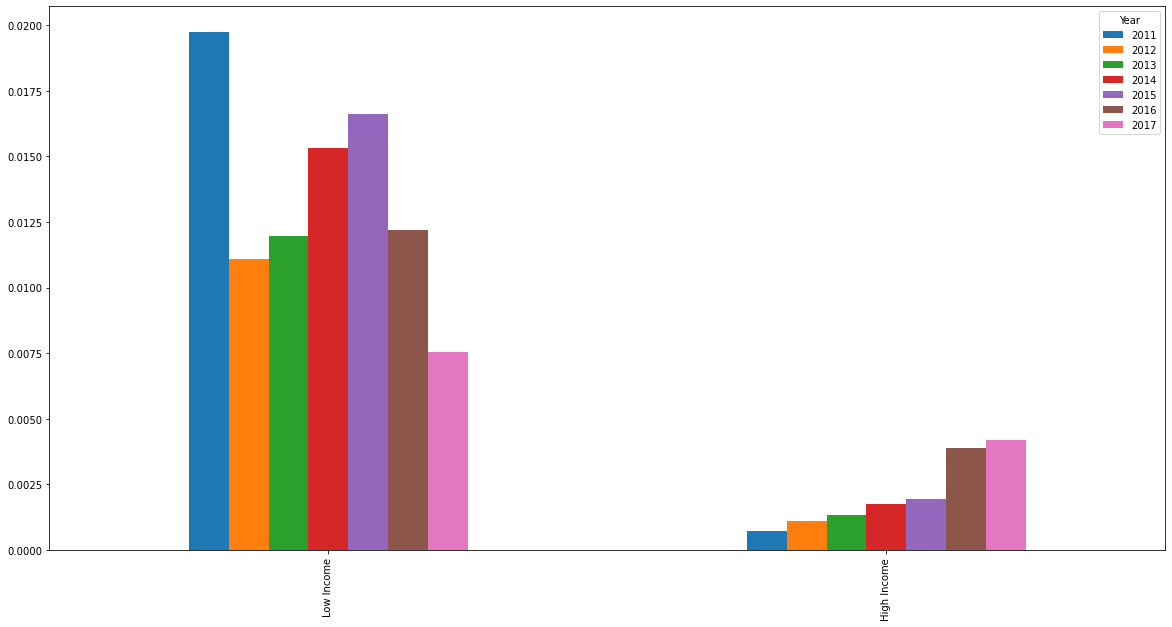

In [97]:
inc_death.plot.bar(figsize=(20,10))
plt.savefig('Deaths by income group')

Text(0, 0.5, 'Deaths per Capita')

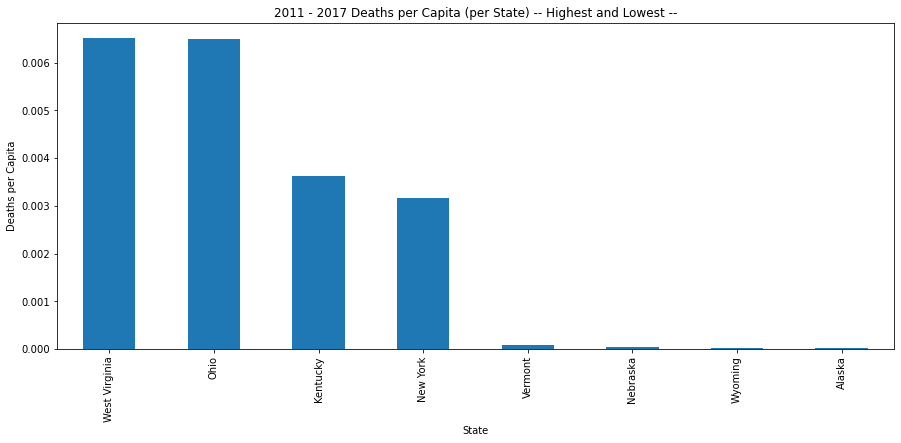

In [98]:
new_fig = death_per.sort_values(['avg deaths per'],ascending=False)
new_fig[(new_fig['avg deaths per']>0.003171) | ((new_fig['avg deaths per']<0.0000900)&(new_fig['avg deaths per']>0))]\
['avg deaths per'].plot.bar(figsize=(15,6))
plt.xticks(rotation='vertical')
plt.title('2011 - 2017 Deaths per Capita (per State) -- Highest and Lowest --')
plt.ylabel('Deaths per Capita')